# Feature Engineering

In [1]:
import pandas as pd
df = pd.read_csv('datasets/KNN_Imputer_Diabetes.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,213,33.6,0.627,50
1,1,85,66,29,72,26.6,0.351,31
2,8,183,64,29,214,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [2]:
data = df.copy()
print("Diabetes data set dimensions : {}".format(data.shape))

Diabetes data set dimensions : (768, 8)


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use("ggplot")


# A) outliers Handling

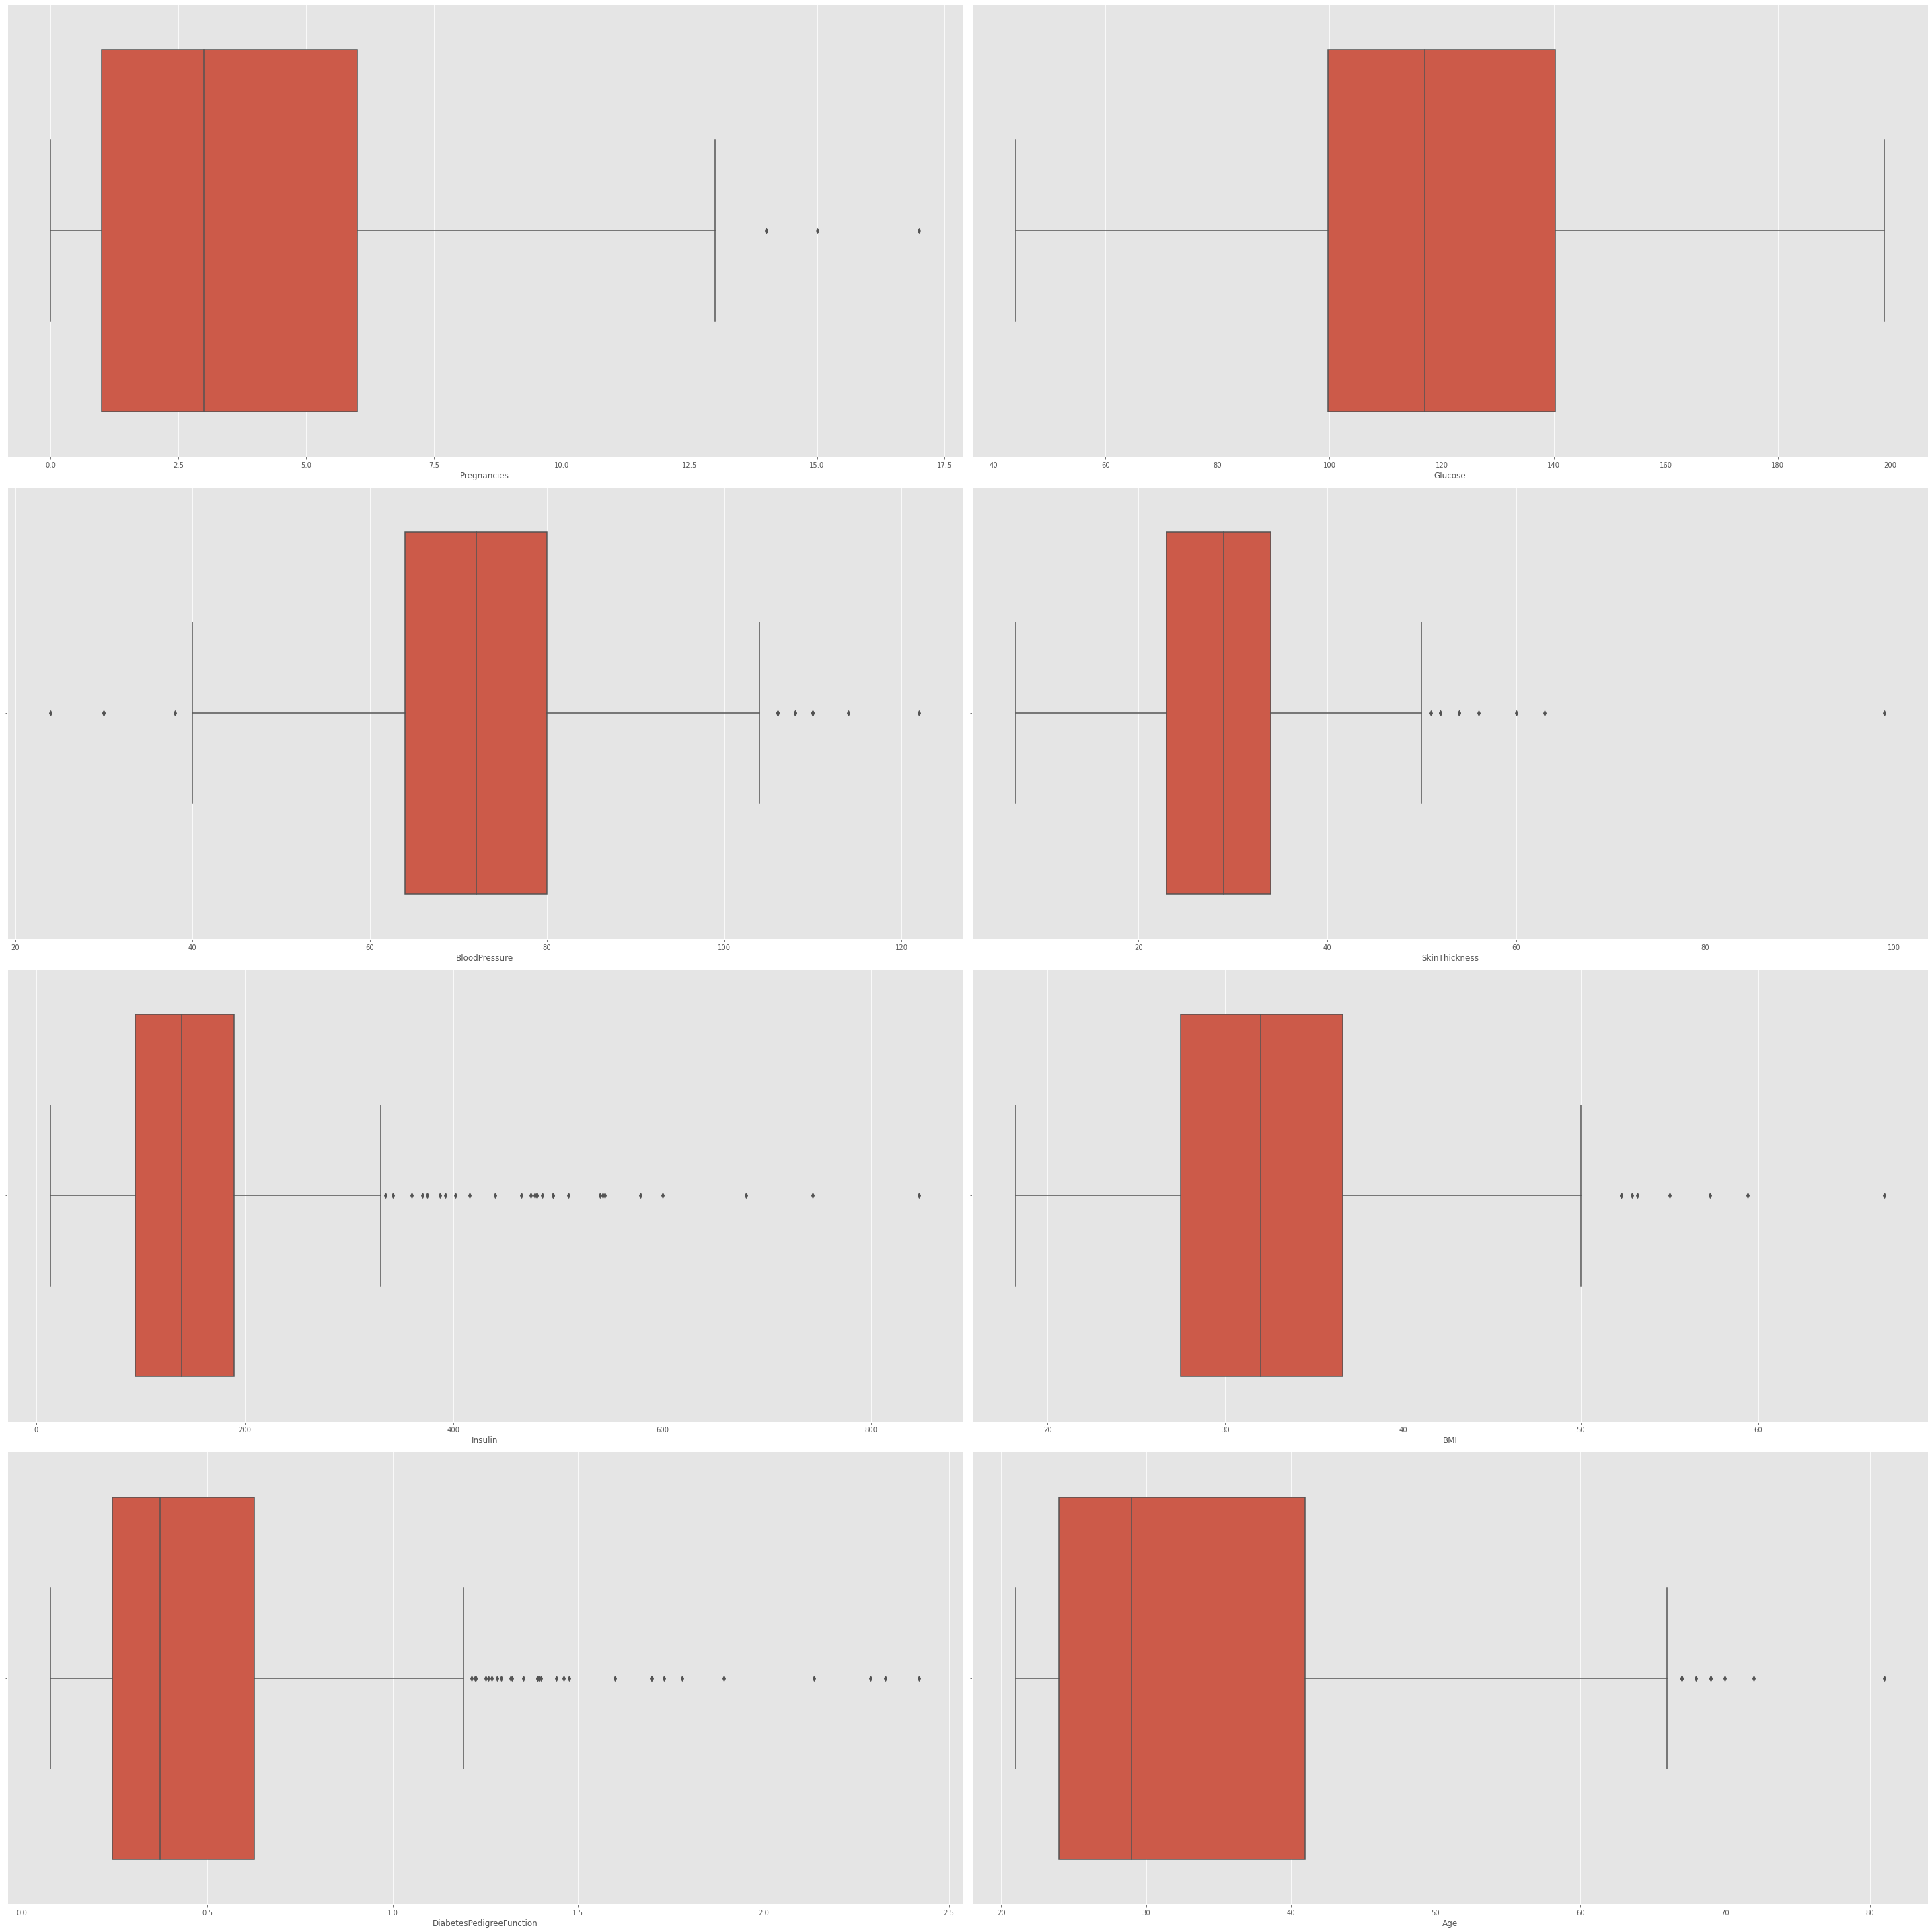

In [4]:
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(40, 40))
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]

for i, col in enumerate(data.columns):
    sns.boxplot(x= data[col], ax= ax[i])
    
plt.tight_layout()

we observe that there are lot of outliers present in our dataset except for Age group.

before going to handling outliers first check how our data is distributed.

###  Distribution Check

###### Q-Q plot Function

**Q-Q**(quantile-quantile) Plot is better for visualizing whether feature is ``Gausian Distribution`` or ``skewed distribution``.

In [5]:
import scipy.stats as stats

In [6]:
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1) 
    sns.distplot(df[variable])
    
    # Displaying Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()
    


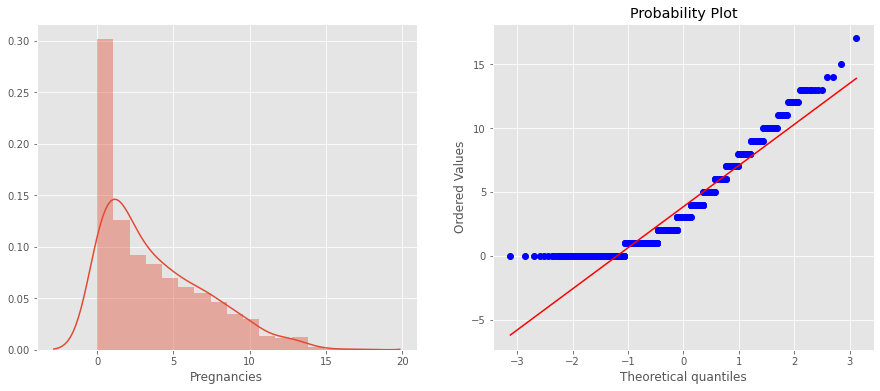

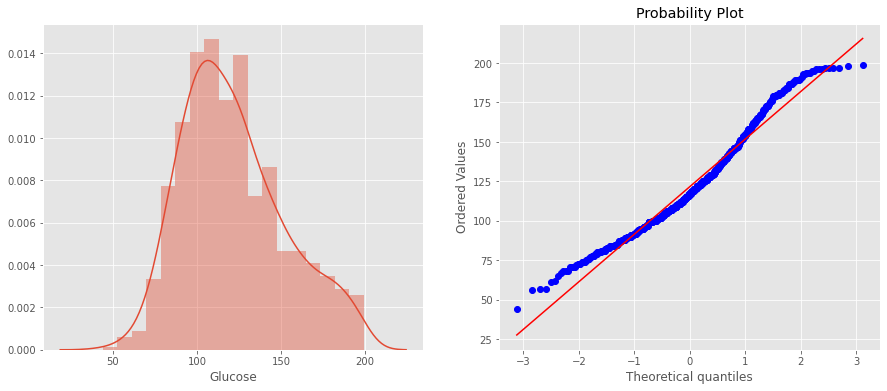

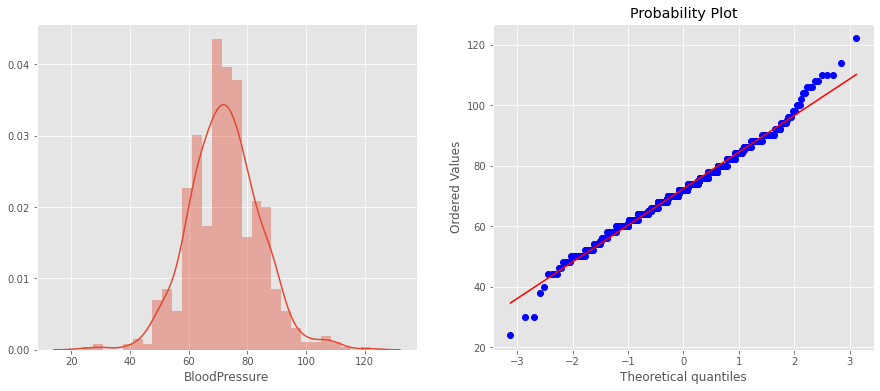

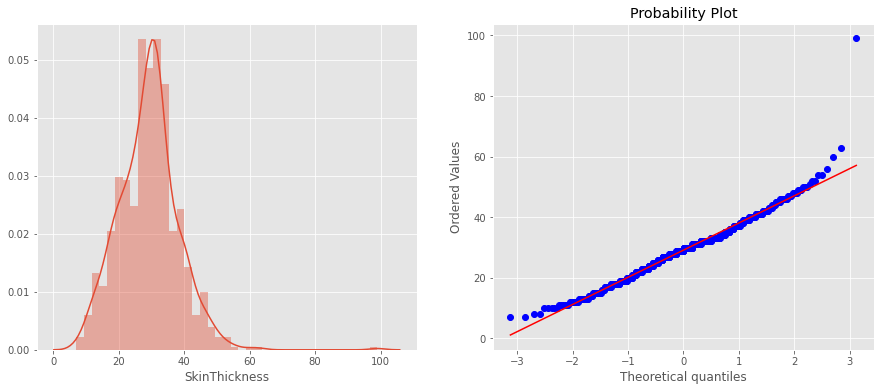

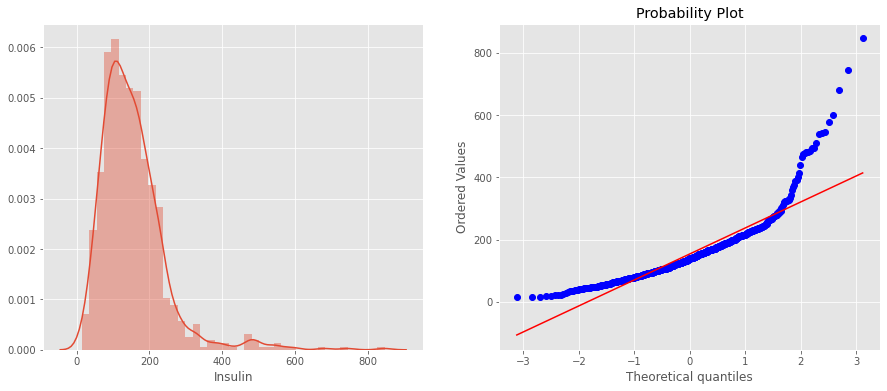

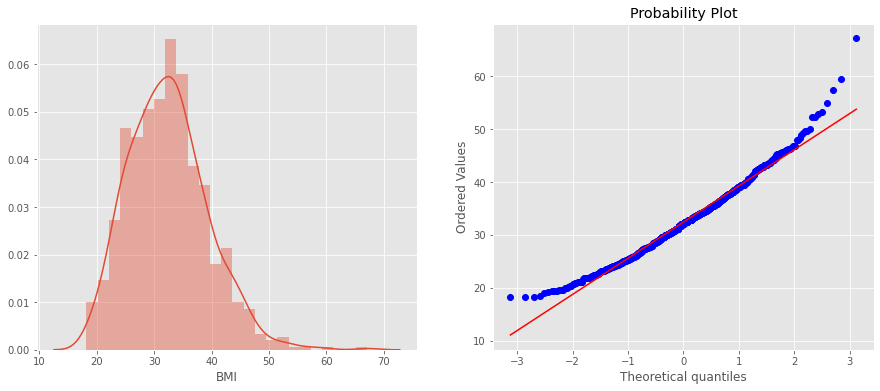

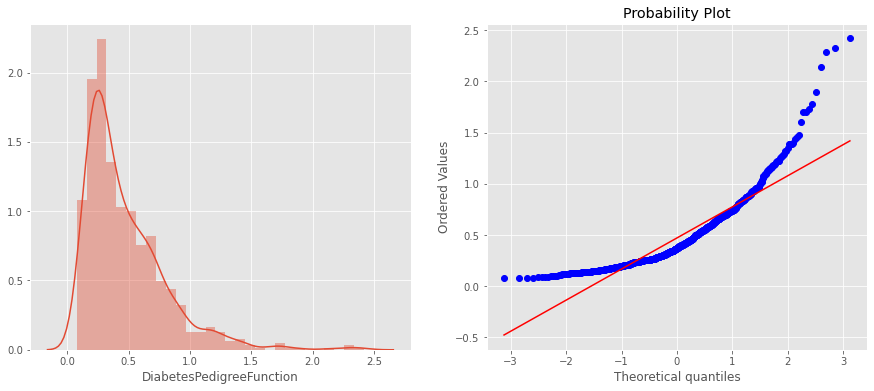

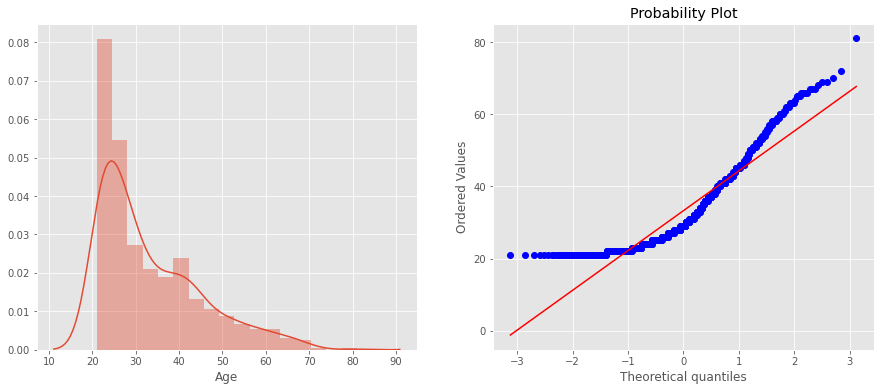

In [7]:
for col in data.columns:
    diagnostic_plots(data, col)

Here we observed that almost all our data is ``skewed(Right skewed)``

In [8]:
outlier_df = pd.DataFrame(data.columns, columns = ['Columns'])
outlier_df

,Columns
0,Pregnancies
1,Glucose
2,BloodPressure
3,SkinThickness
4,Insulin
5,BMI
6,DiabetesPedigreeFunction
7,Age


In [9]:
for i, col in enumerate(data.columns):
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
    outlier_df.loc[i, 'Lower_Bound'] = data[col].quantile(0.25)-(IQR*1.5)
    outlier_df.loc[i, 'Upper_Bound'] = data[col].quantile(0.75)+(IQR*1.5)
outlier_df

,Columns,Lower_Bound,Upper_Bound
0,Pregnancies,-6.50,13.50
1,Glucose,39.00,201.00
2,BloodPressure,40.00,104.00
3,SkinThickness,6.50,50.50
4,Insulin,-47.50,332.50
5,BMI,13.85,50.25
6,DiabetesPedigreeFunction,-0.33,1.20
7,Age,-1.50,66.50


In [10]:
for i, col in enumerate(data.columns):
    if col == 'BloodPressure':
        data[col] = np.where(data[col] <= outlier_df.loc[i, 'Lower_Bound'], outlier_df.loc[i, 'Lower_Bound'].astype(int), data[col])
        data[col] = np.where(data[col] >= outlier_df.loc[i, 'Upper_Bound'], outlier_df.loc[i, 'Upper_Bound'].astype(int), data[col])
    elif col not in ['BMI', 'DiabetesPedigreeFunction']:
        data[col] = np.where(data[col] >= outlier_df.loc[i, 'Upper_Bound'], outlier_df.loc[i, 'Upper_Bound'].astype(int), data[col])
    else:
        data[col] = np.where(data[col] >= outlier_df.loc[i, 'Upper_Bound'], outlier_df.loc[i, 'Upper_Bound'], data[col])

In [11]:
data.loc[459, 'Age']

66

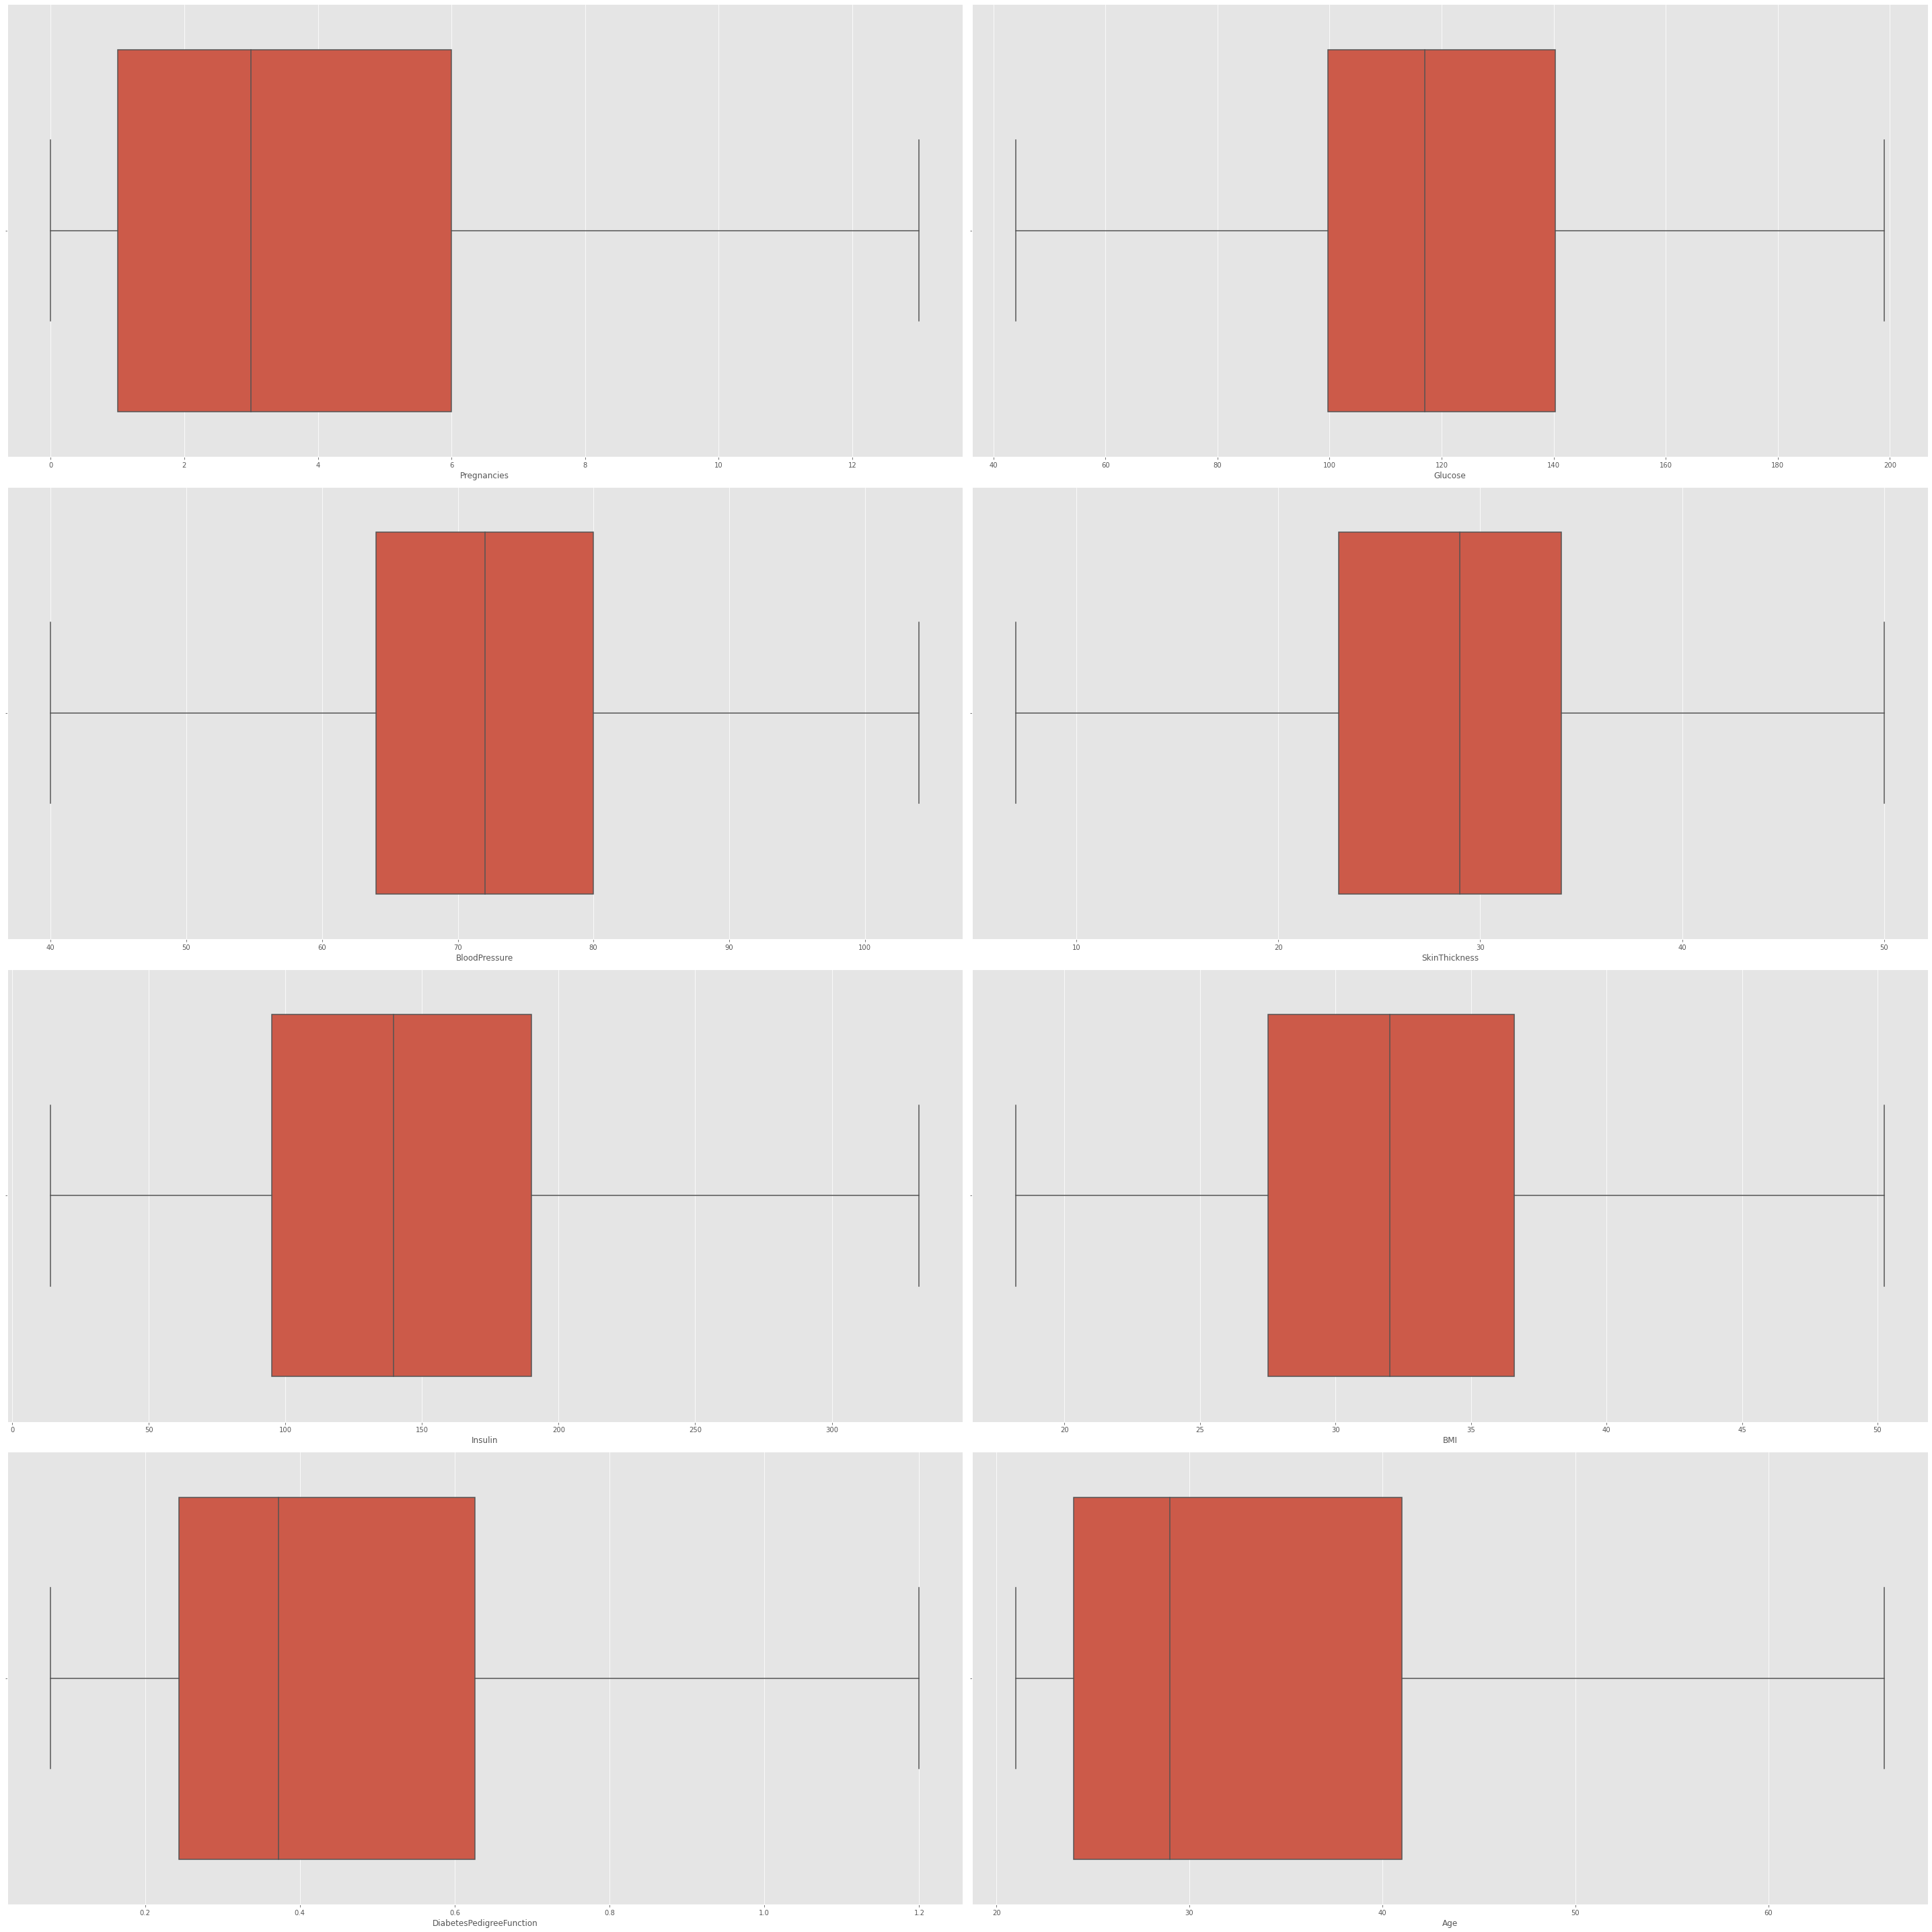

In [12]:
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(40, 40))
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]

for i, col in enumerate(data.columns):
    sns.boxplot(x= data[col], ax= ax[i])
    
plt.tight_layout()

Here we observed there are no More outliers present.

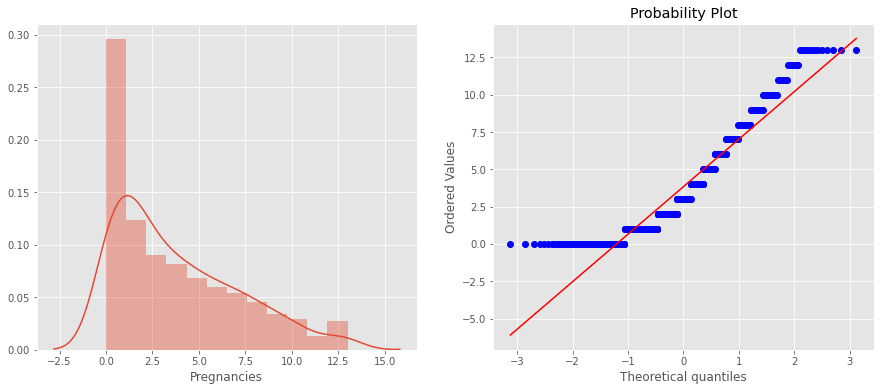

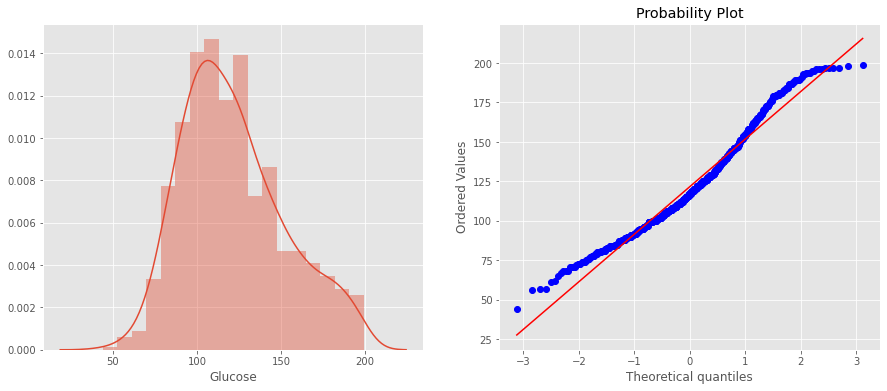

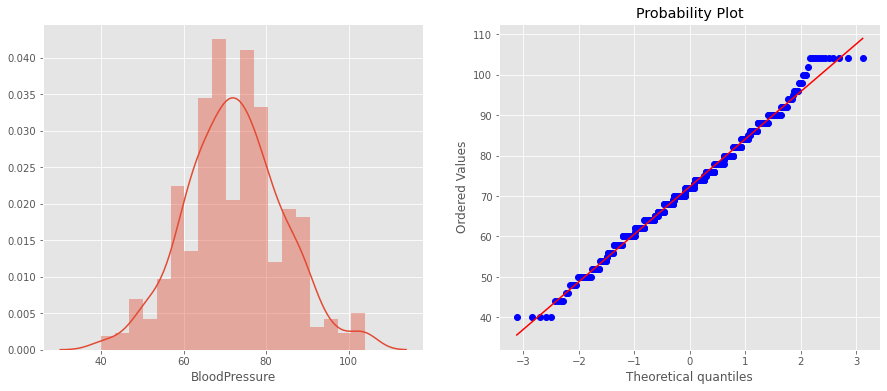

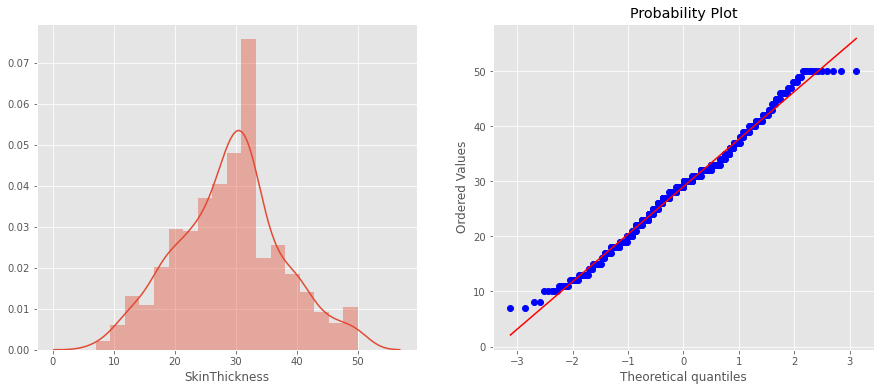

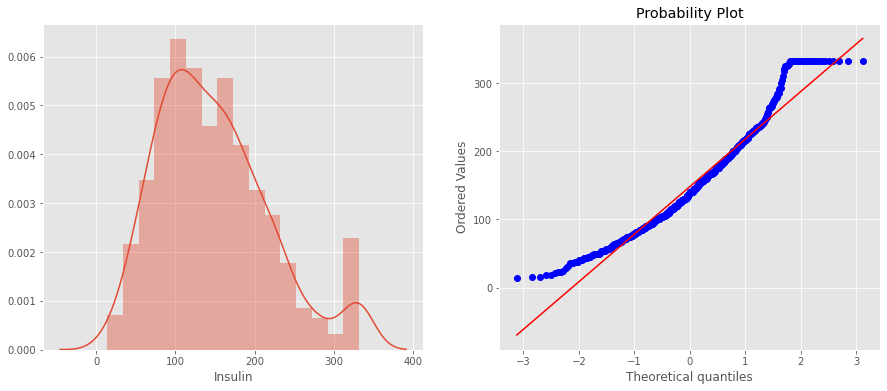

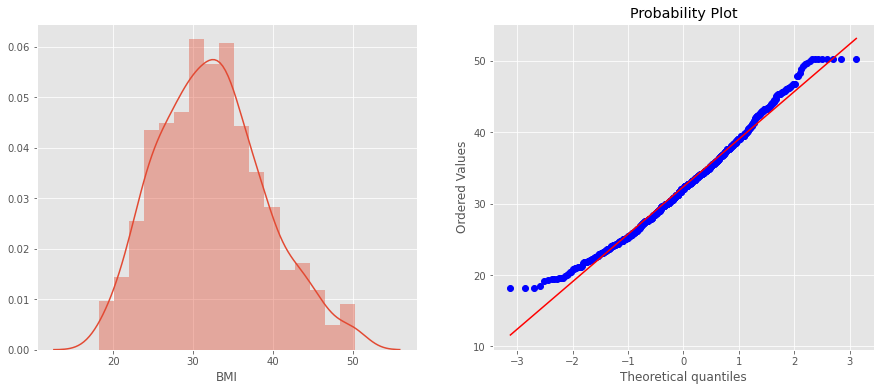

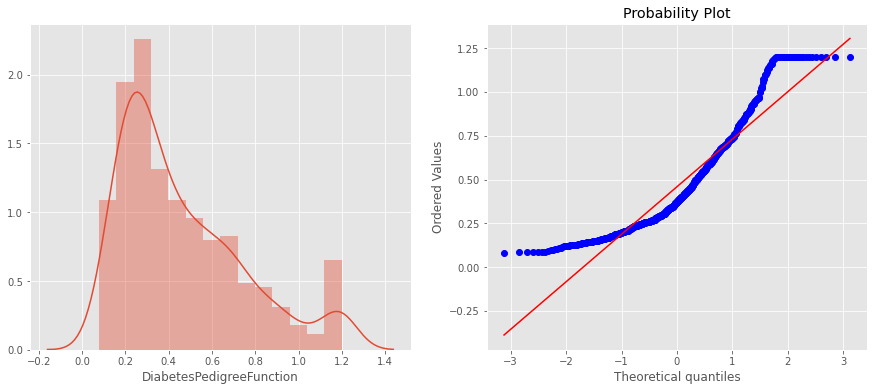

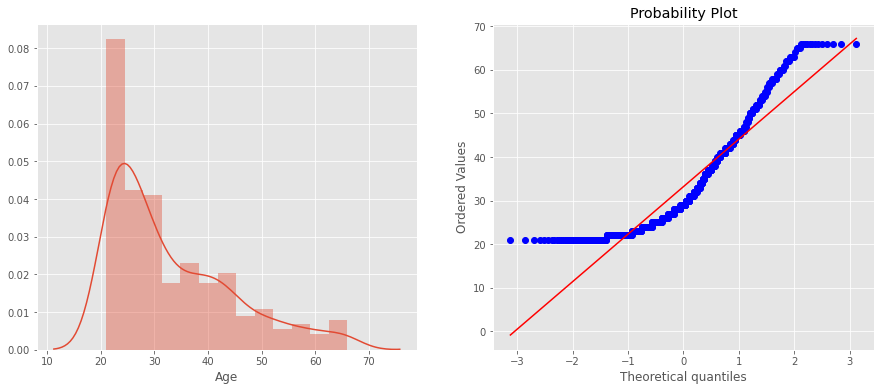

In [13]:
for col in data.columns:
    diagnostic_plots(data, col)

From the above graphs it is clear that Data is not gausian Distributed.

## B) Gausian Transformation

In [14]:
Gausian_df = pd.DataFrame()

### 1) Logarithmic Transformation

In [15]:
for col in data.columns:
    Gausian_df['Log_' + col] = np.log(data[col]+1) 
    # Here log(0) is not defined. So we add +1.
   

### 2) Reciprocal transformation

In [16]:
for col in data.columns:
    Gausian_df['Reci_' + col] = 1/(data[col]+1) 

### 3) Sqaure Root Tansformation

In [17]:
for col in data.columns:
    Gausian_df['Sqrt_' + col] = data[col]**(1/2)
    

### 4) Exponential Tanformation

In [18]:
for col in data.columns:
    Gausian_df['Exp_' + col] = data[col]**(1/5)


## 5) Yeo-Johnson Transform

In [19]:
from sklearn.preprocessing import PowerTransformer

In [20]:
cols = []
for i in data.columns:
    cols.append('YeoJoh_' +i)
cols

['YeoJoh_Pregnancies',
 'YeoJoh_Glucose',
 'YeoJoh_BloodPressure',
 'YeoJoh_SkinThickness',
 'YeoJoh_Insulin',
 'YeoJoh_BMI',
 'YeoJoh_DiabetesPedigreeFunction',
 'YeoJoh_Age']

In [21]:
power = PowerTransformer(method = 'yeo-johnson', standardize= False)
data_trans = power.fit_transform(data)
data_trans_df = pd.DataFrame(data_trans)
data_trans_df.columns = cols
data_trans_df.head()

,YeoJoh_Pregnancies,YeoJoh_Glucose,YeoJoh_BloodPressure,YeoJoh_SkinThickness,YeoJoh_Insulin,YeoJoh_BMI,YeoJoh_DiabetesPedigreeFunction,YeoJoh_Age
0,2.330737,6.205037,36.329902,27.149304,20.023718,5.605497,0.310087,0.870964
1,0.738299,5.390749,33.865339,22.854380,11.929581,5.087564,0.225562,0.863878
2,2.695814,6.527653,33.033688,22.854380,20.067285,4.808004,0.320037,0.864470
3,0.738299,5.456704,33.865339,18.475901,13.590624,5.206304,0.132705,0.854735
4,0.000000,6.089163,22.561724,27.149304,17.924559,6.193787,0.394806,0.865025


In [22]:
Gausian_df = pd.concat([Gausian_df, data_trans_df], axis= 1)

**comparing each attribute with all Gausian Transforms**

In [23]:
Pre_names = ['Log_', 'Reci_', 'Sqrt_', 'Exp_', 'YeoJoh_']

#### For Pregnancies

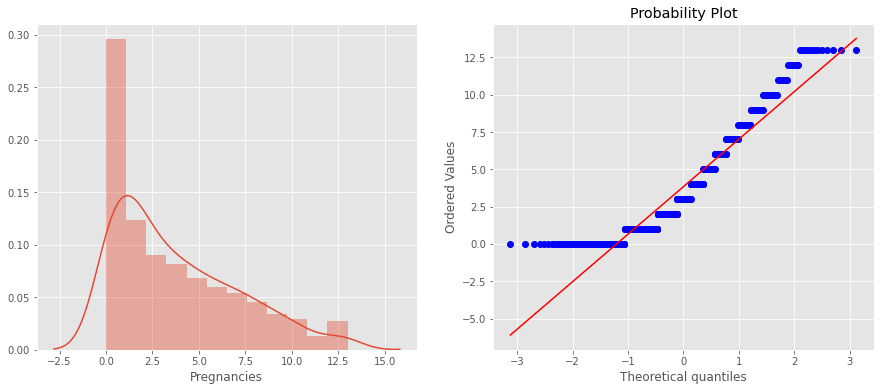

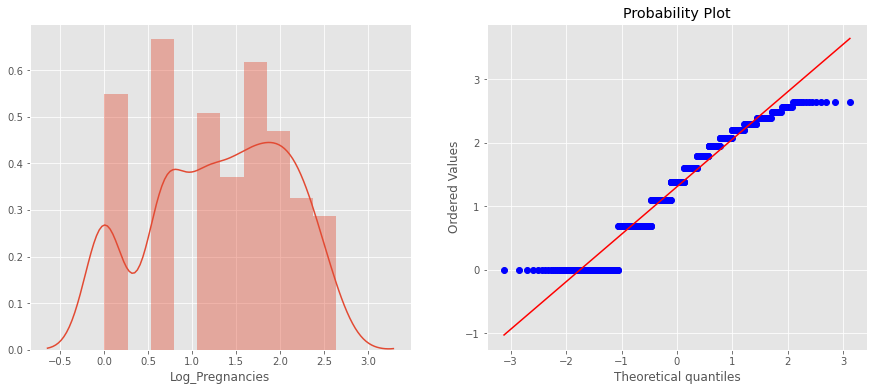

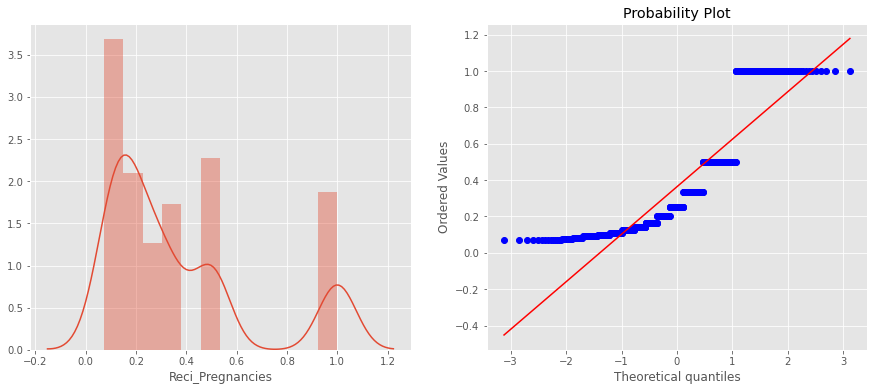

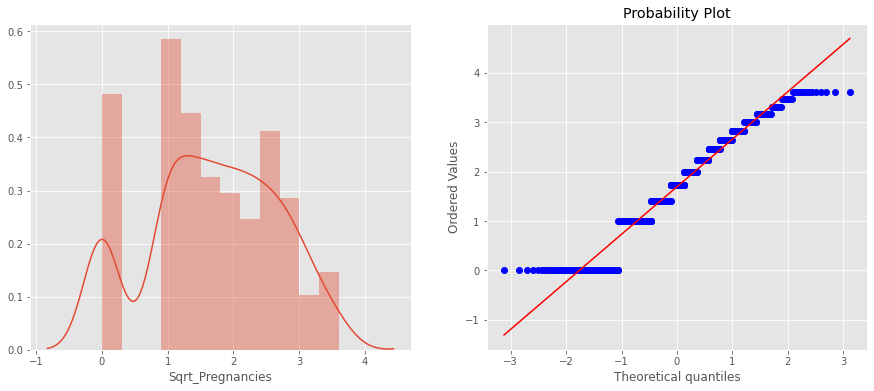

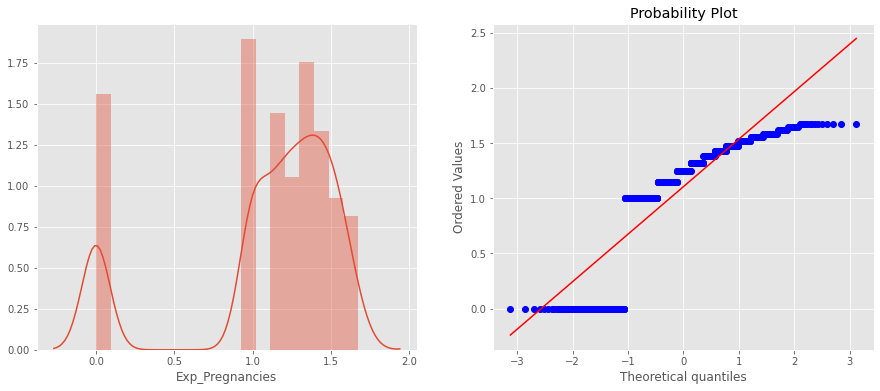

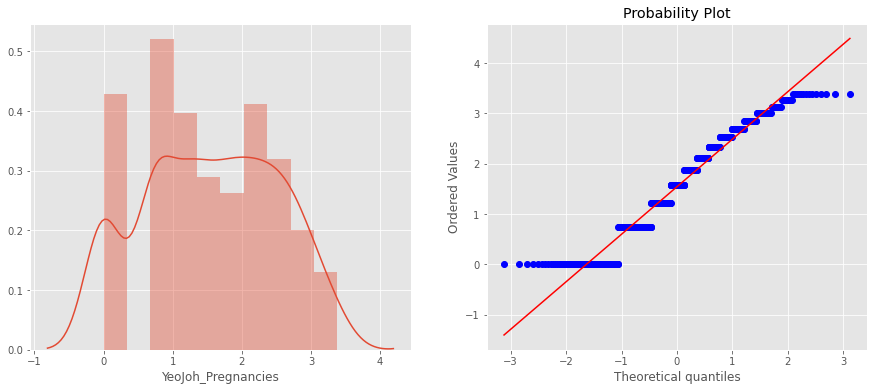

In [24]:
diagnostic_plots(data, data.columns[0]) #original distribution.
for col in Pre_names:
    diagnostic_plots(Gausian_df, col + data.columns[0]) #transformed Distributions.

#### For Glucose

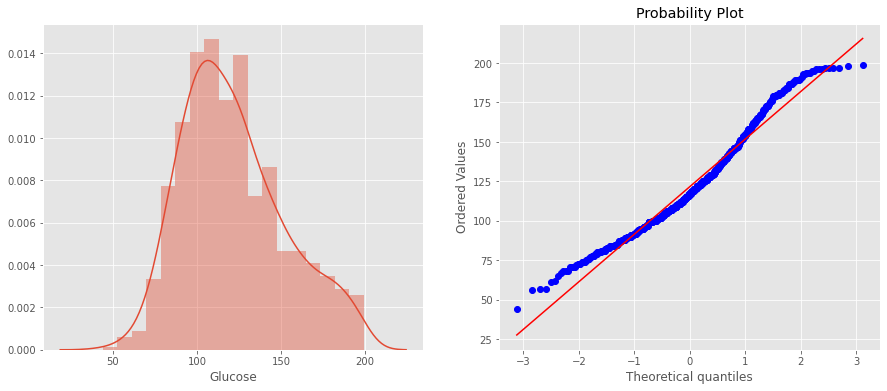

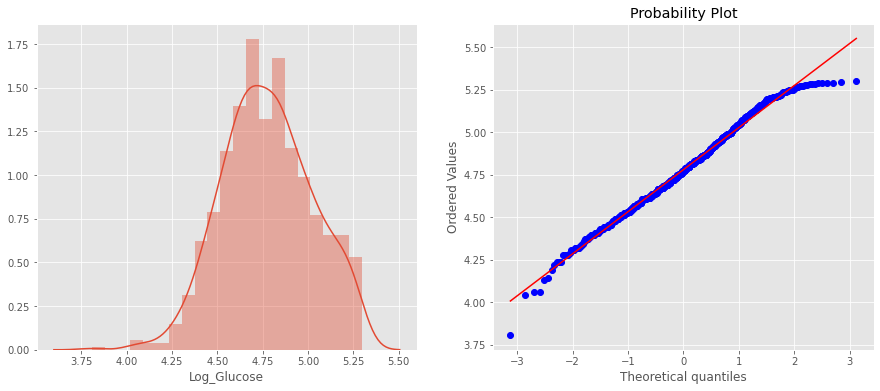

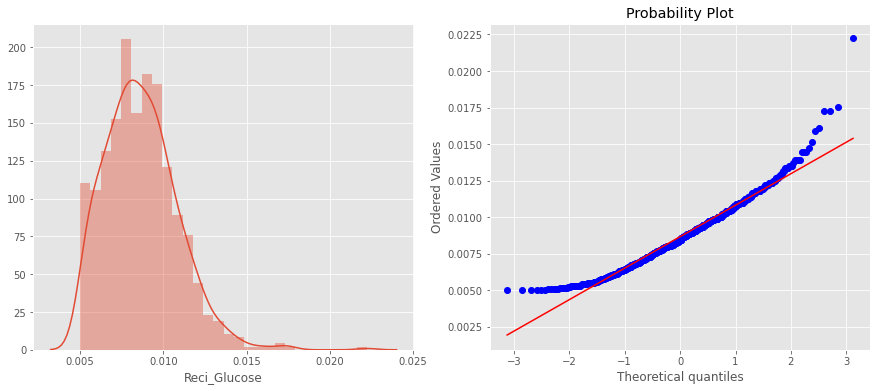

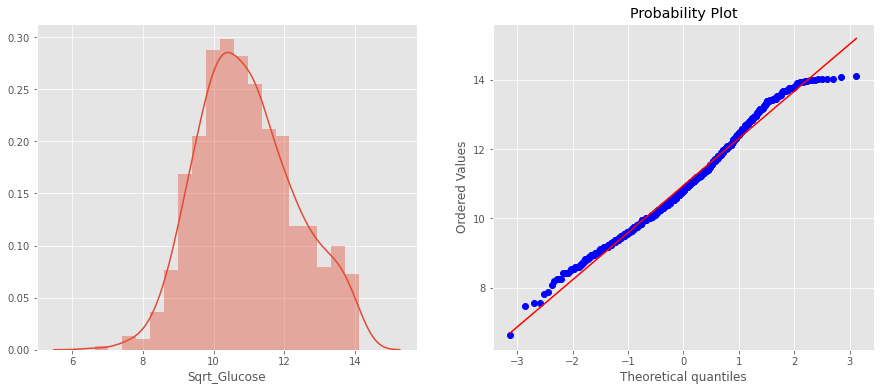

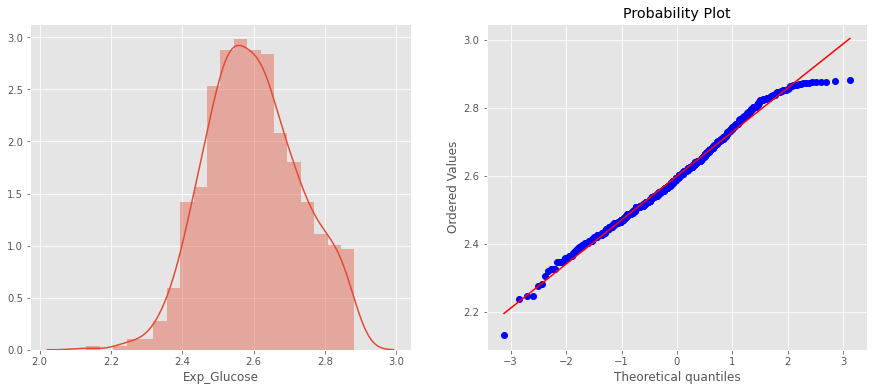

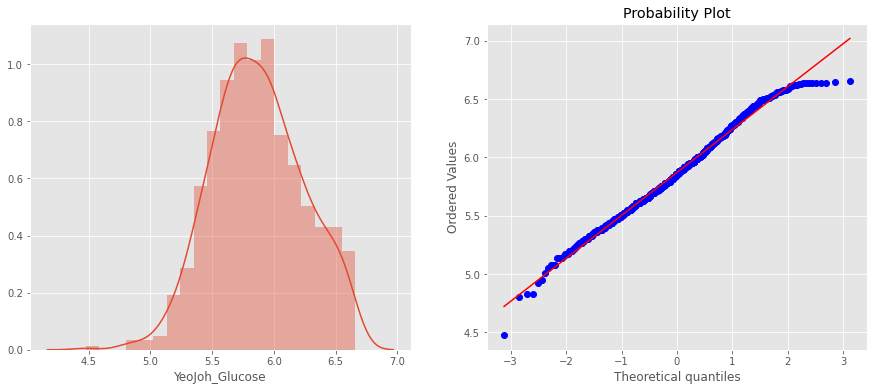

In [25]:
diagnostic_plots(data, data.columns[1])
for col in Pre_names:
    diagnostic_plots(Gausian_df, col + data.columns[1])

#### For BloodPressure

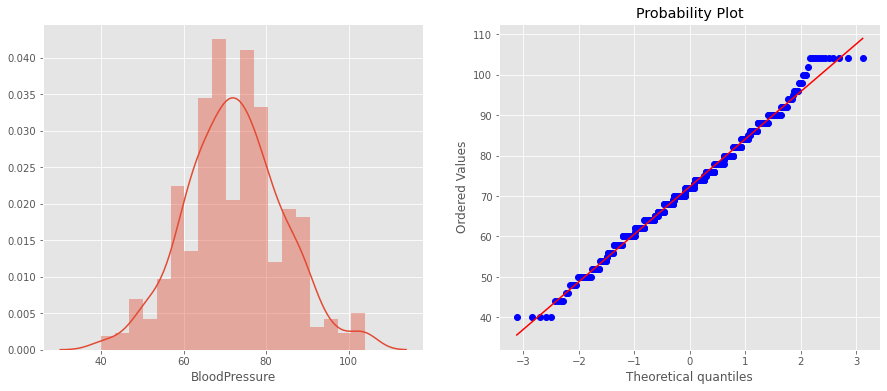

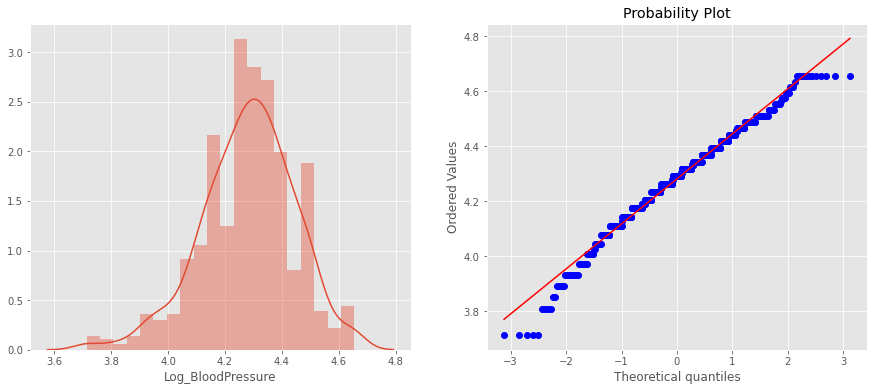

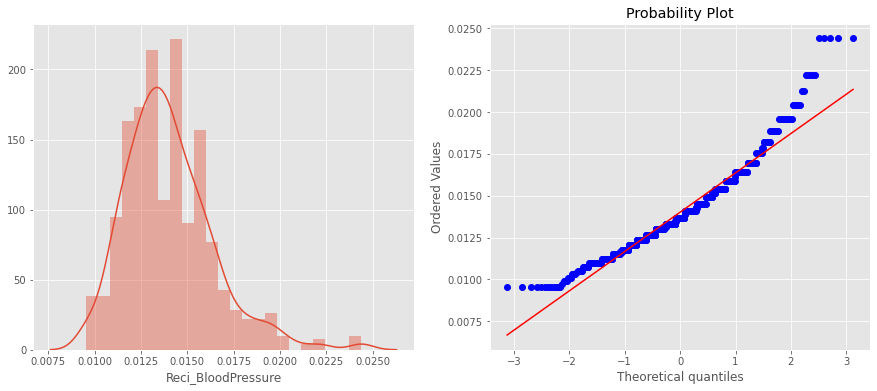

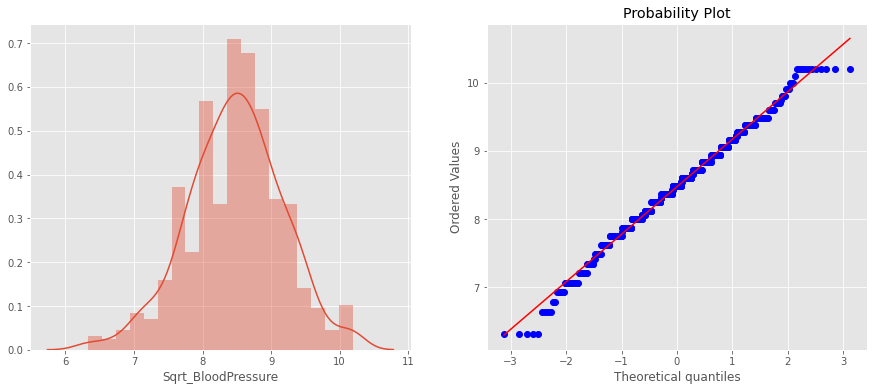

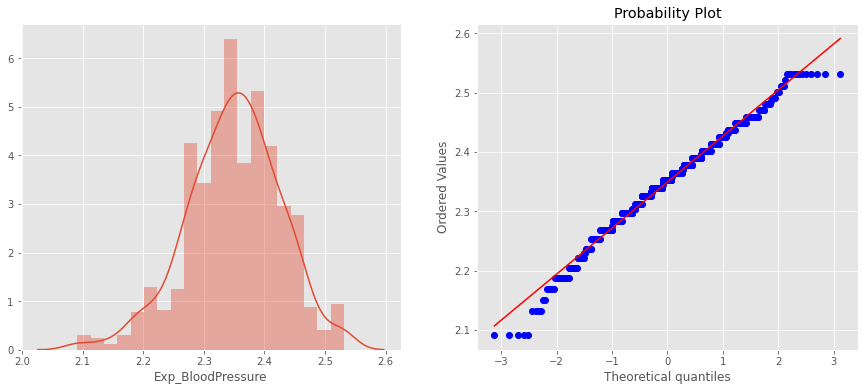

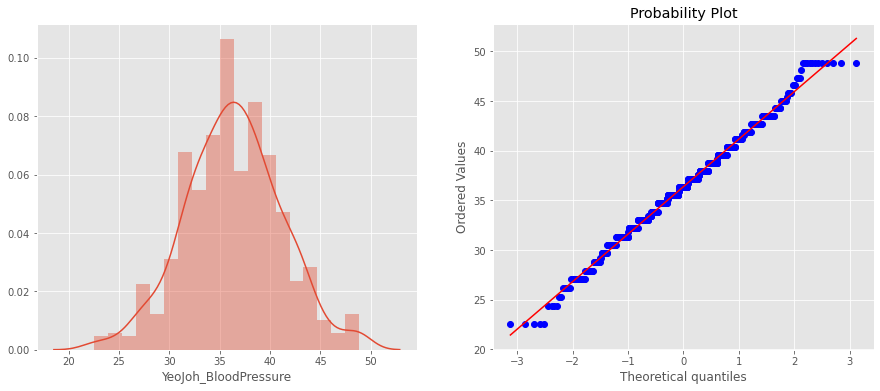

In [26]:
diagnostic_plots(data, data.columns[2])
for col in Pre_names:
    diagnostic_plots(Gausian_df, col + data.columns[2])

#### For SkinThickness

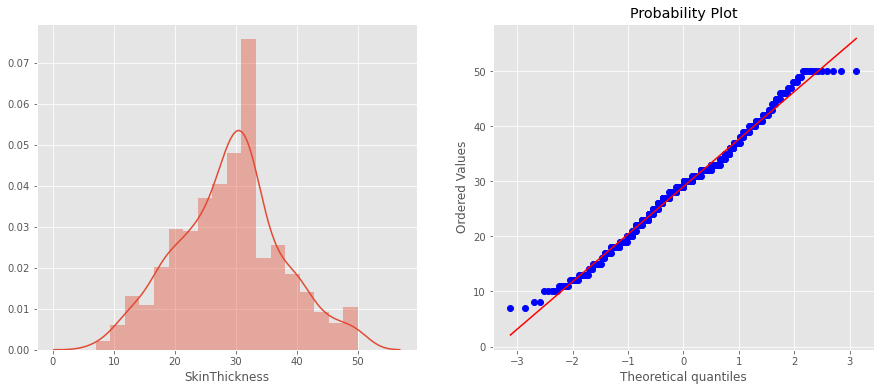

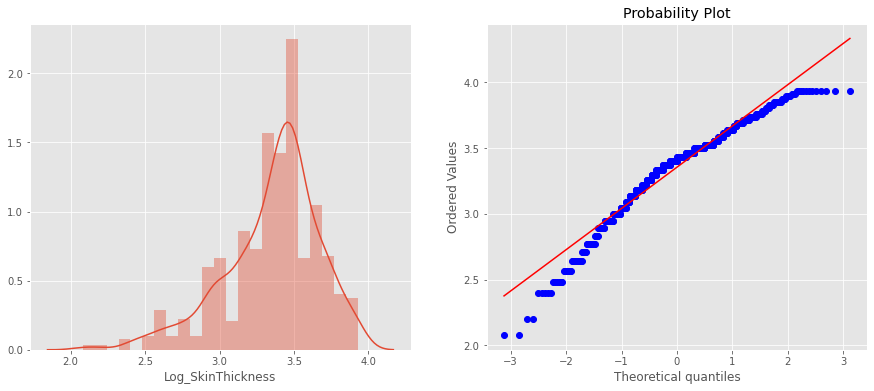

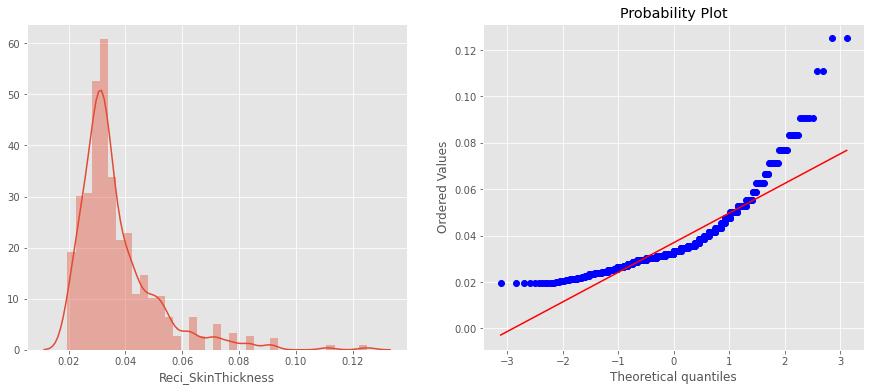

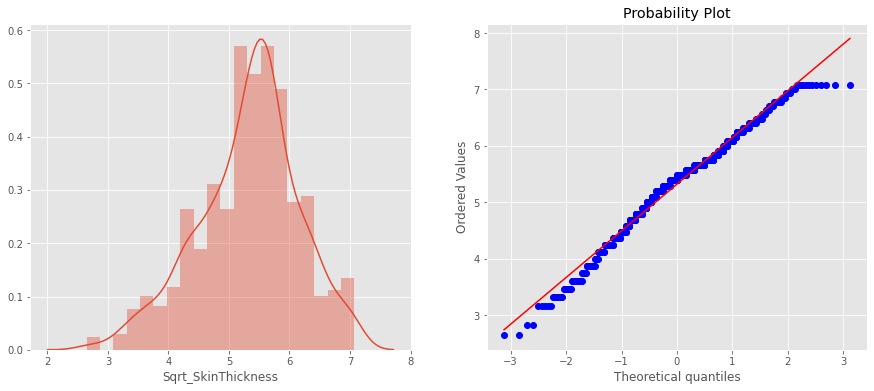

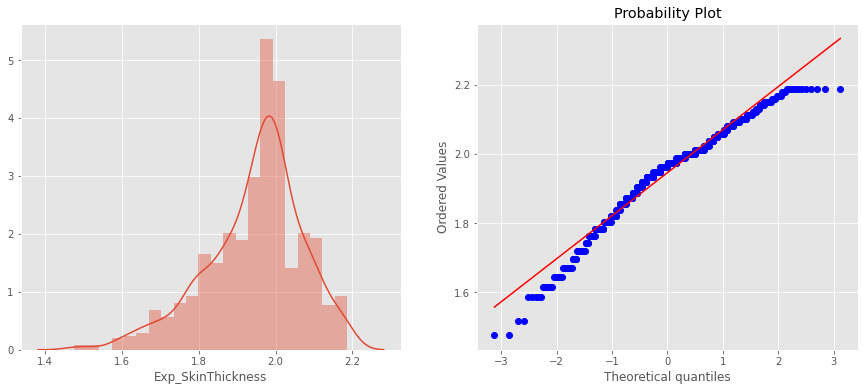

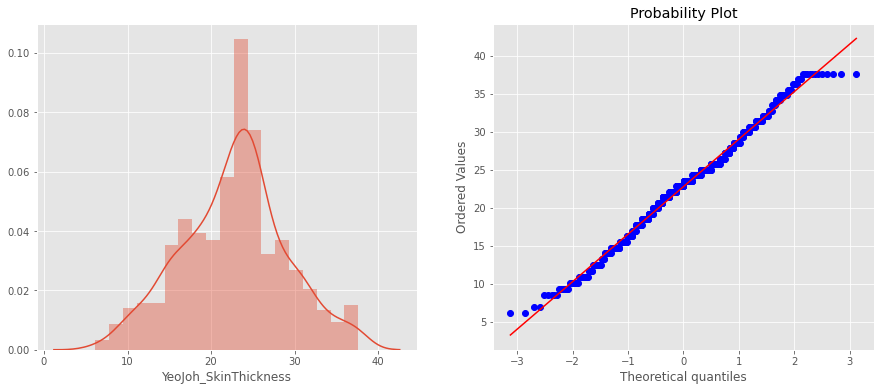

In [27]:
diagnostic_plots(data, data.columns[3])
for col in Pre_names:
    diagnostic_plots(Gausian_df, col + data.columns[3])

#### For Insulin

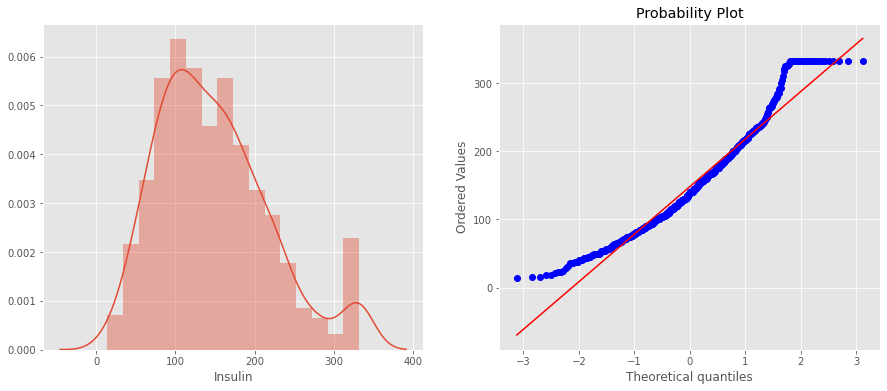

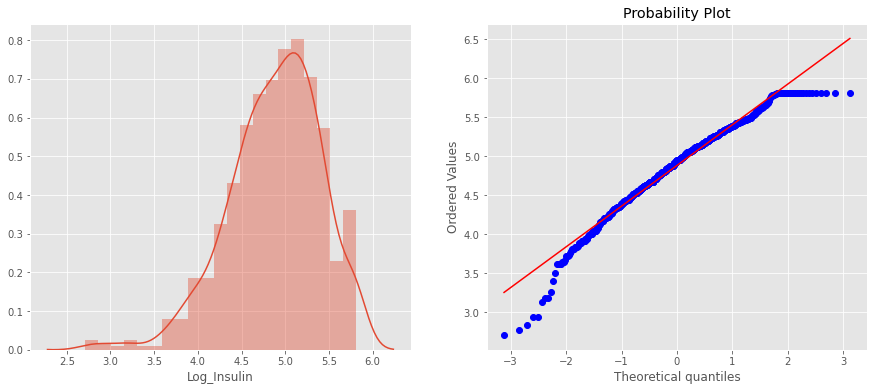

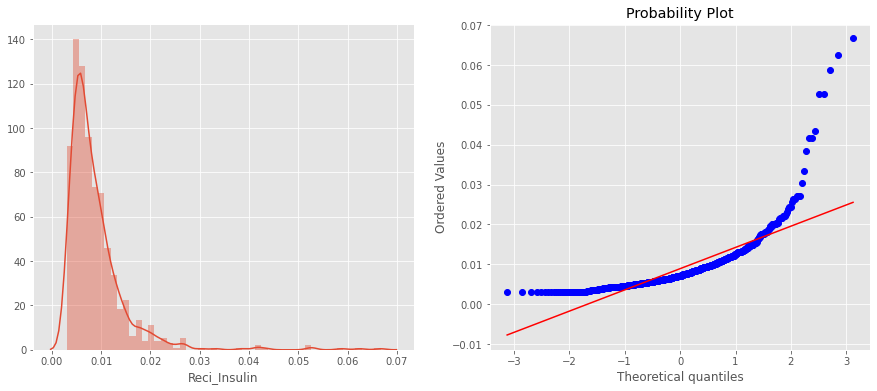

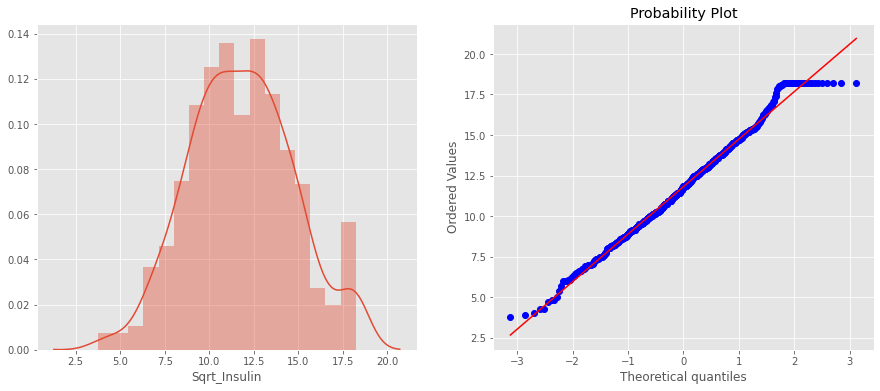

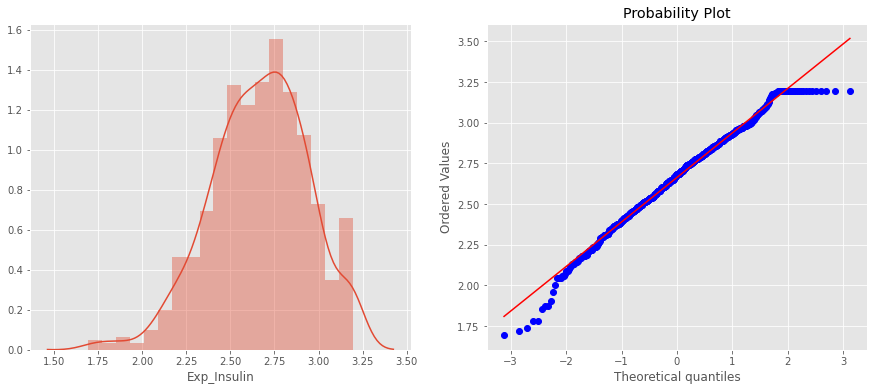

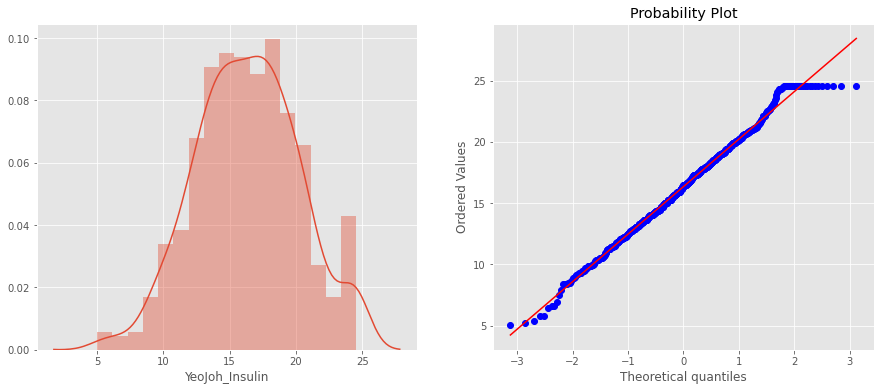

In [28]:
diagnostic_plots(data, data.columns[4])
for col in Pre_names:
    diagnostic_plots(Gausian_df, col + data.columns[4])

#### For BMI

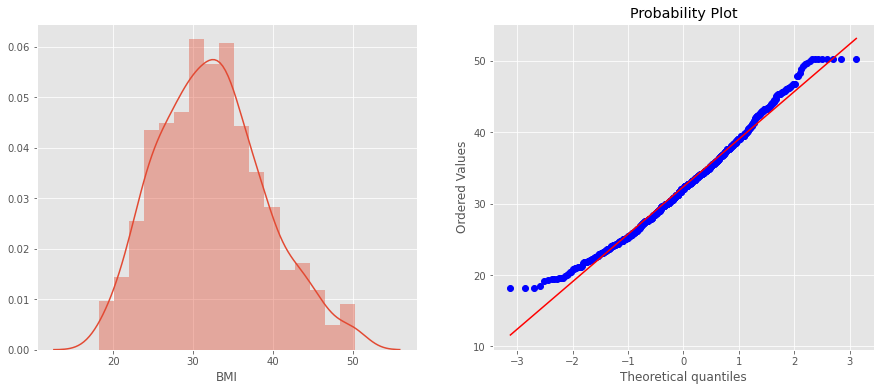

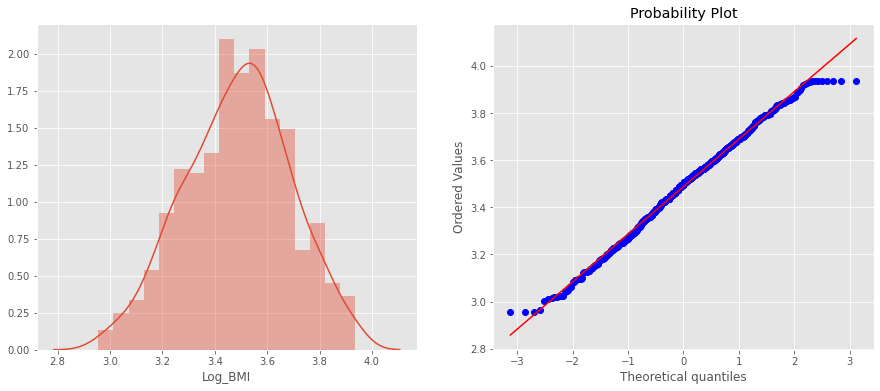

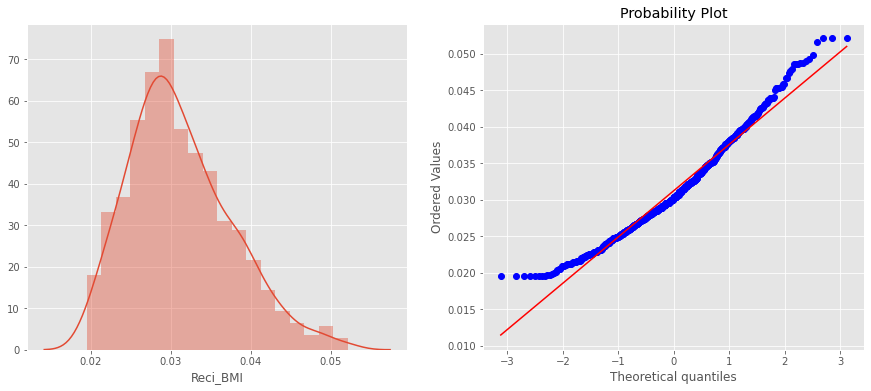

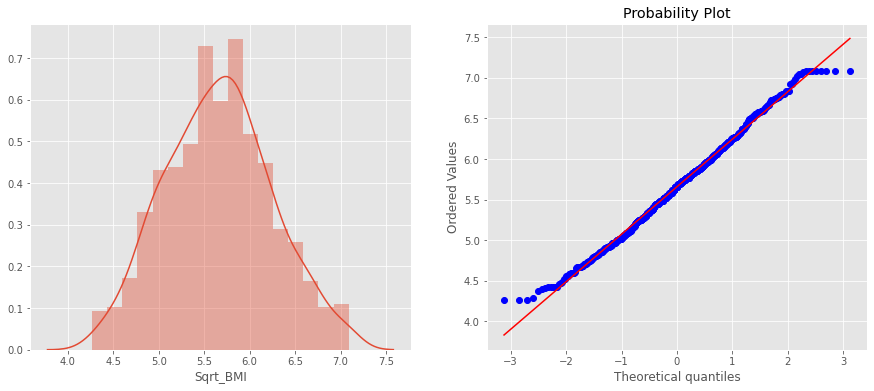

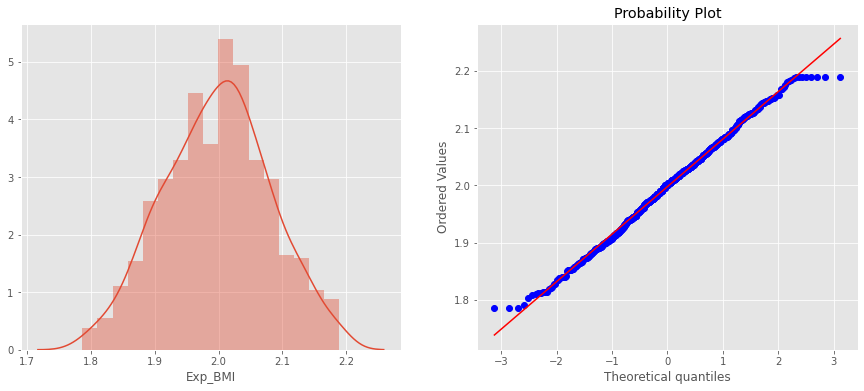

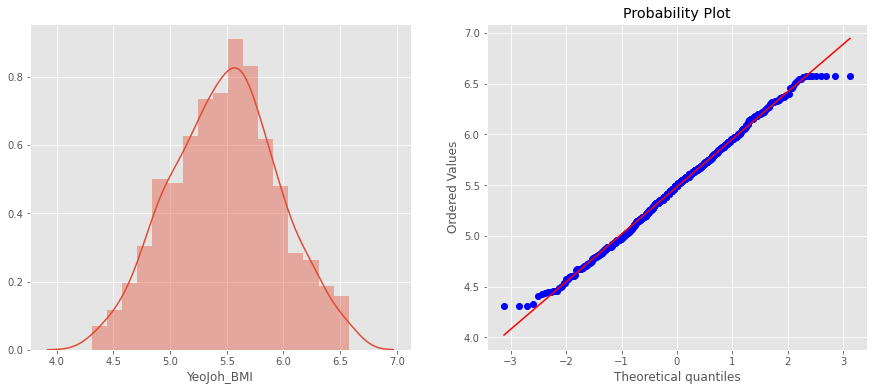

In [29]:
diagnostic_plots(data, data.columns[5])
for col in Pre_names:
    diagnostic_plots(Gausian_df, col + data.columns[5])

#### For DiabetesPedigreeFunction

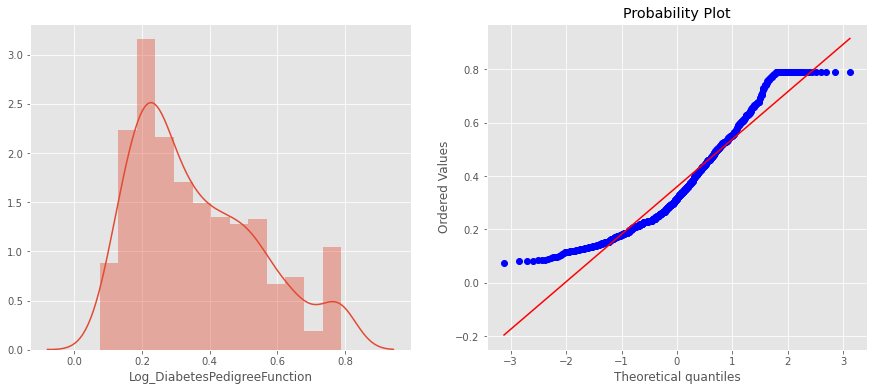

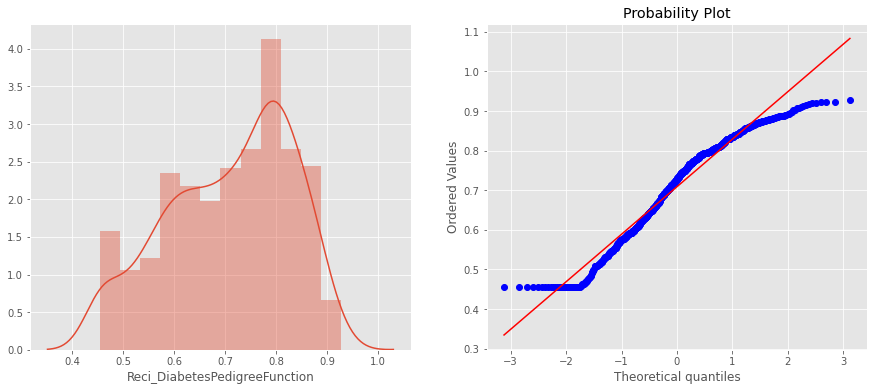

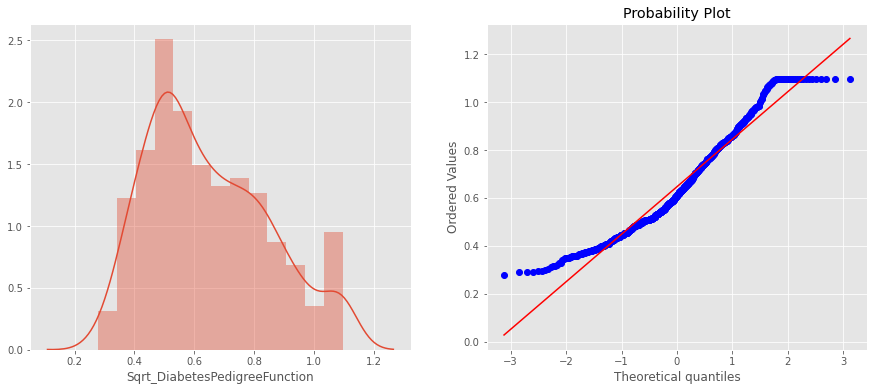

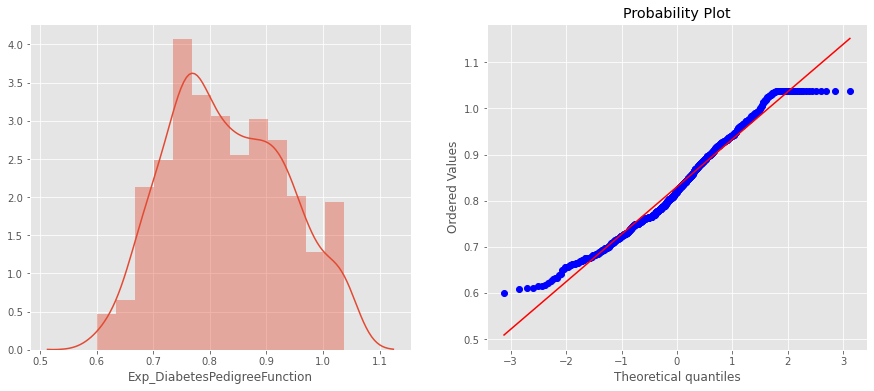

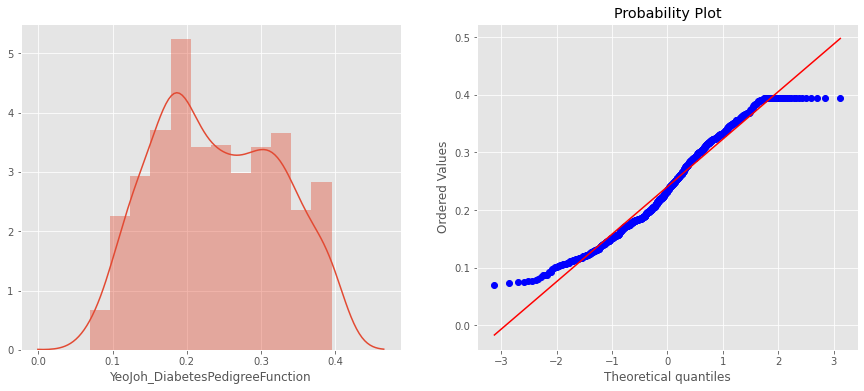

In [30]:
for col in Pre_names:
    diagnostic_plots(Gausian_df, col + data.columns[6])

#### For Age

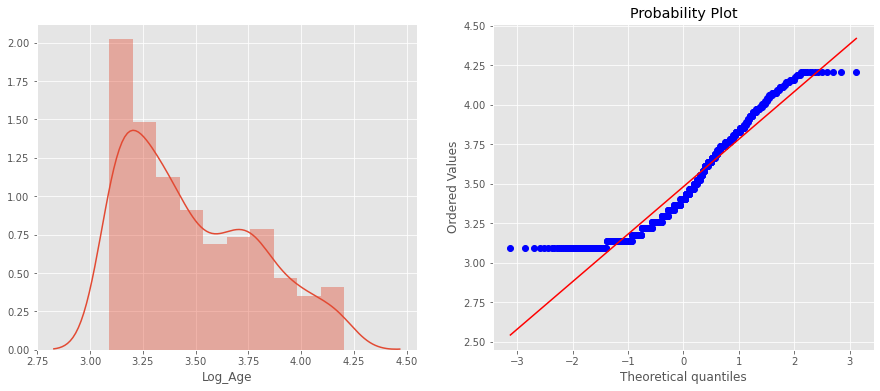

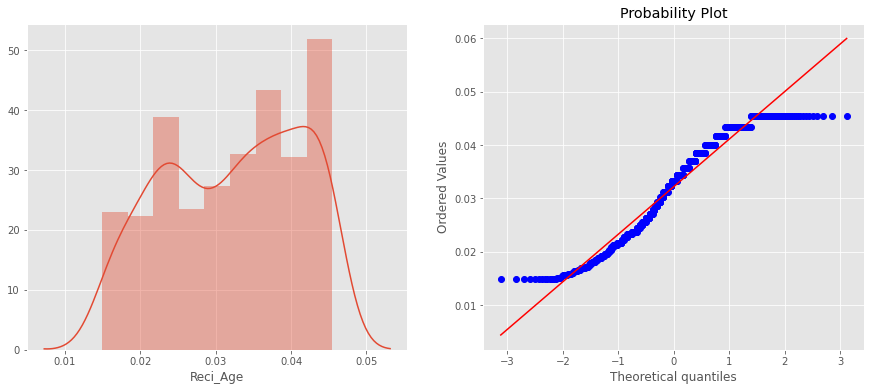

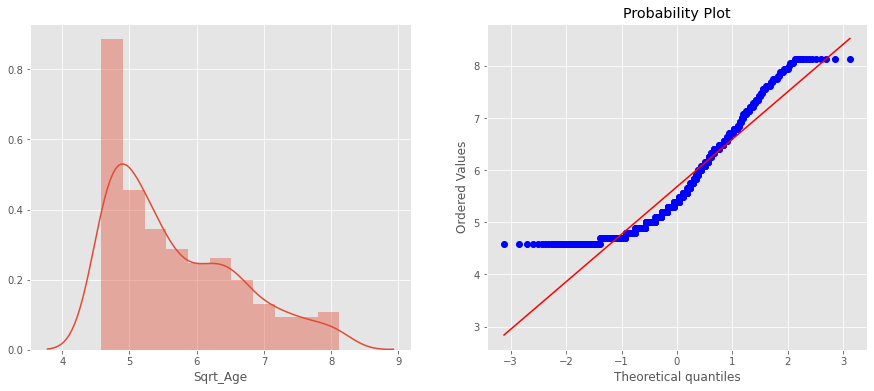

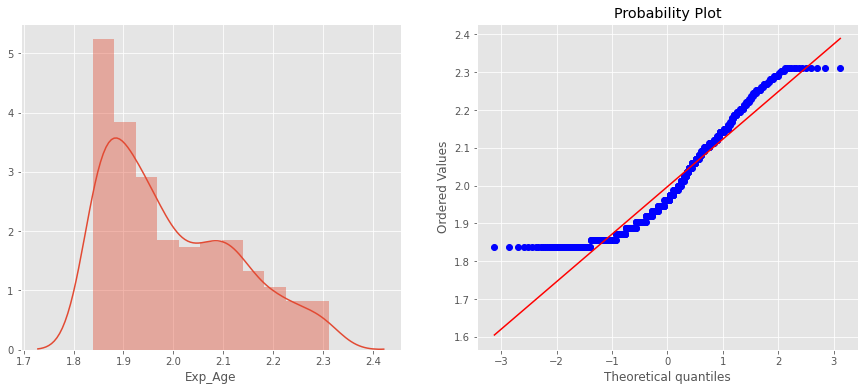

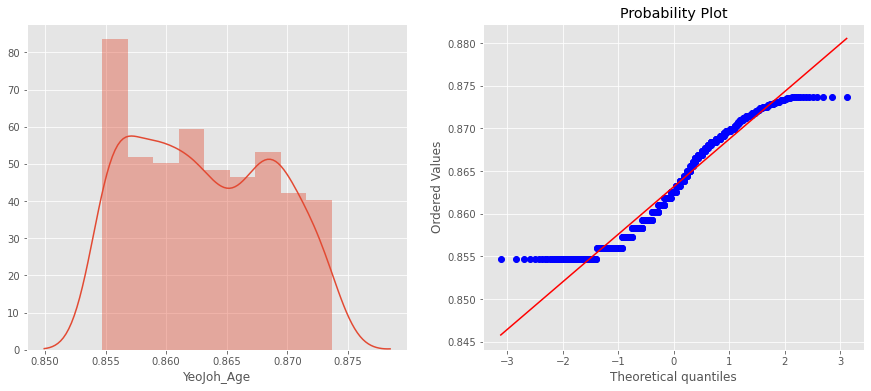

In [31]:
for col in Pre_names:
    diagnostic_plots(Gausian_df, col + data.columns[7])

Hence it is clear that **Yeo-Johnson Transformation** better fits data almost like a ``Gausian`` Distribution.

### save Dataset

In [32]:
data_trans_df.columns = df.columns
data_trans_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2.330737,6.205037,36.329902,27.149304,20.023718,5.605497,0.310087,0.870964
1,0.738299,5.390749,33.865339,22.854380,11.929581,5.087564,0.225562,0.863878
2,2.695814,6.527653,33.033688,22.854380,20.067285,4.808004,0.320037,0.864470
3,0.738299,5.456704,33.865339,18.475901,13.590624,5.206304,0.132705,0.854735
4,0.000000,6.089163,22.561724,27.149304,17.924559,6.193787,0.394806,0.865025


In [33]:
data_trans_df.to_csv('datasets/Diabetes After Feature Engineering', index =False)